<a href="https://colab.research.google.com/github/iampython-team/A-D_BoonDocks/blob/main/UsedCars_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
from google.colab import files
uploaded = files.upload()

In [33]:
pwd

'/content'

In [34]:
ls

autos.csv  cleanedauto.csv  sample_data/


In [35]:
data=pd.read_csv('autos.csv',encoding='latin-1')
data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [36]:
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [37]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [38]:
data['vehicleType'].isnull().values.sum()

37869

In [39]:
data['vehicleType'].fillna("other",inplace=True)
data['vehicleType'].isnull().values.sum()

0

In [40]:
data['offerType'].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [41]:
data['offerType']=data['offerType'].map({'Gesuch':"Application","Angebot":"Offer"})

In [42]:
data['offerType'].unique()

array(['Offer', 'Application'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


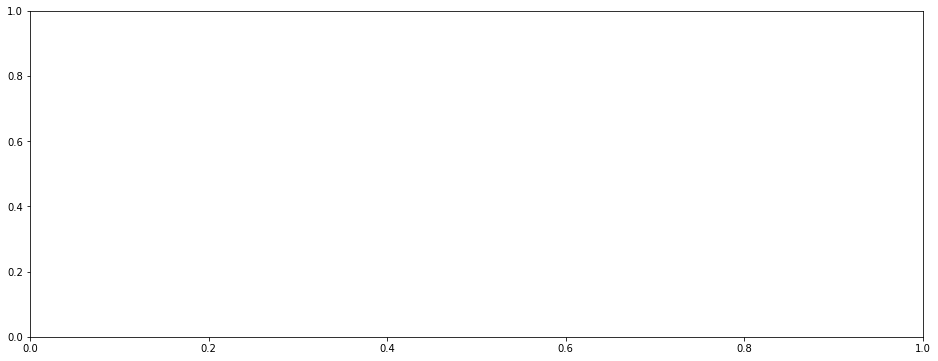

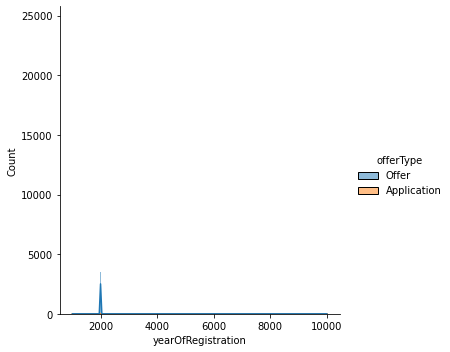

In [43]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(16,6))
fig,ax=plt.subplots(figsize=(16,6))
import seaborn as sns 
sns.displot(data=data,x='yearOfRegistration',kde=True,hue='offerType',ax=ax)

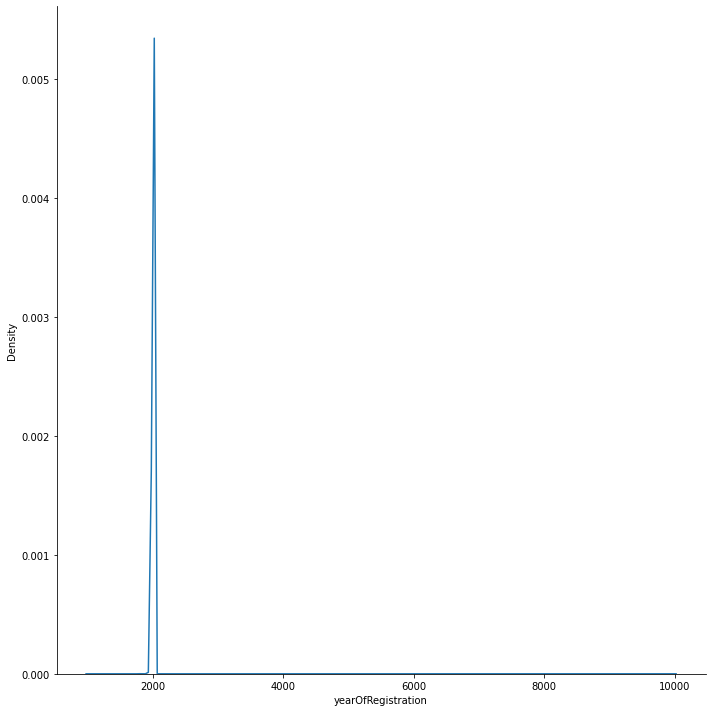

In [44]:
sns.displot(data=data,x='yearOfRegistration',kind='kde',height=10)

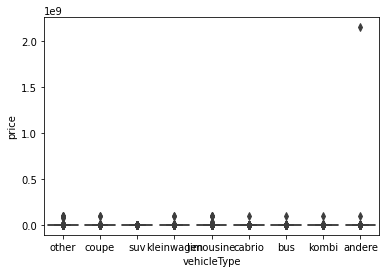

In [45]:
sns.boxplot(x="vehicleType",y="price",data=data,)
#ax.text("hello this sample text ..",fontsize=18,color="r",ha="center",va="center")

In [46]:
# # mean of the prices of all vehicle type 
median_=data.groupby('vehicleType')['price'].median()
#75 th percentile 
quantile75_=data.groupby('vehicleType')['price'].quantile(0.75)
#25 th percentile 
quantile25_=data.groupby('vehicleType')['price'].quantile(0.25)

#Cal iq values of prices of each vehicle type above which all the values are outliers 
iqr=(quantile75_ - quantile25_)*1.5+median_
iqr

vehicleType
andere         8434.0
bus           13948.5
cabrio        21400.0
coupe         24300.0
kleinwagen     5775.0
kombi         13076.5
limousine     12801.5
other          5100.0
suv           28800.0
Name: price, dtype: float64

In [47]:
#! removing outliers 
data=data[
          ((data['vehicleType']=="andere") & (data['price'] <= 8434)) | 
          ((data['vehicleType']=="bus") & (data['price'] <= 13948)) | 
          ((data['vehicleType']=="cabrio") & (data['price'] <= 21400)) | 
          ((data['vehicleType']=="coupe") & (data['price'] <= 24300)) | 
          ((data['vehicleType']=="kleinwagen") & (data['price'] <= 13076)) | 
          ((data['vehicleType']=="limousine") & (data['price'] <= 12801)) | 
          ((data['vehicleType']=="other") & (data['price'] <= 12801)) |
          ((data['vehicleType']=="suv") & (data['price'] <= 28800)) 


]
data.shape

(280043, 20)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280043 entries, 0 to 371525
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          280043 non-null  object
 1   name                 280043 non-null  object
 2   seller               280043 non-null  object
 3   offerType            280043 non-null  object
 4   price                280043 non-null  int64 
 5   abtest               280043 non-null  object
 6   vehicleType          280043 non-null  object
 7   yearOfRegistration   280043 non-null  int64 
 8   gearbox              262164 non-null  object
 9   powerPS              280043 non-null  int64 
 10  model                262826 non-null  object
 11  kilometer            280043 non-null  int64 
 12  monthOfRegistration  280043 non-null  int64 
 13  fuelType             250987 non-null  object
 14  brand                280043 non-null  object
 15  notRepairedDamage    220000 non-nu

In [49]:
data['gearbox'].isnull().sum()

17879

In [50]:
data['gearbox'].unique()
data['gearbox'].fillna("other",inplace=True)
data['gearbox'].isnull().values.sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [51]:
data['model'].unique()
data['model'].isnull().sum()
data['model'].fillna("other",inplace=True)
data['model'].isnull().values.sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [52]:
data['fuelType'].unique()
data['fuelType'].isnull().sum()
data['fuelType'].fillna("other",inplace=True)
data['fuelType'].isnull().values.sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [53]:
data['notRepairedDamage'].unique()
data['notRepairedDamage'].isnull().sum()
data['notRepairedDamage'].fillna("other",inplace=True)
data['notRepairedDamage'].isnull().values.sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280043 entries, 0 to 371525
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          280043 non-null  object
 1   name                 280043 non-null  object
 2   seller               280043 non-null  object
 3   offerType            280043 non-null  object
 4   price                280043 non-null  int64 
 5   abtest               280043 non-null  object
 6   vehicleType          280043 non-null  object
 7   yearOfRegistration   280043 non-null  int64 
 8   gearbox              280043 non-null  object
 9   powerPS              280043 non-null  int64 
 10  model                280043 non-null  object
 11  kilometer            280043 non-null  int64 
 12  monthOfRegistration  280043 non-null  int64 
 13  fuelType             280043 non-null  object
 14  brand                280043 non-null  object
 15  notRepairedDamage    280043 non-nu

In [56]:
del data['nrOfPictures']

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280043 entries, 0 to 371525
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          280043 non-null  object
 1   name                 280043 non-null  object
 2   seller               280043 non-null  object
 3   offerType            280043 non-null  object
 4   price                280043 non-null  int64 
 5   abtest               280043 non-null  object
 6   vehicleType          280043 non-null  object
 7   yearOfRegistration   280043 non-null  int64 
 8   gearbox              280043 non-null  object
 9   powerPS              280043 non-null  int64 
 10  model                280043 non-null  object
 11  kilometer            280043 non-null  int64 
 12  monthOfRegistration  280043 non-null  int64 
 13  fuelType             280043 non-null  object
 14  brand                280043 non-null  object
 15  notRepairedDamage    280043 non-nu

In [59]:
data['dateCrawled']
data['dateCreated']

0         2016-03-24 11:52:17
1         2016-03-24 10:58:45
2         2016-03-14 12:52:21
3         2016-03-17 16:54:04
4         2016-03-31 17:25:20
                 ...         
371521    2016-03-27 20:36:20
371522    2016-03-21 09:50:58
371523    2016-03-14 17:48:27
371524    2016-03-05 19:56:21
371525    2016-03-19 18:57:12
Name: dateCrawled, Length: 280043, dtype: object

In [60]:
data.to_csv('cleanedauto1.csv',index=False)

In [61]:
ls

autos.csv  cleanedauto1.csv  cleanedauto.csv  sample_data/


In [62]:
new_data=pd.read_csv('cleanedauto1.csv')
new_data.shape
new_data.info()

new_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280043 entries, 0 to 280042
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          280043 non-null  object
 1   name                 280043 non-null  object
 2   seller               280043 non-null  object
 3   offerType            280043 non-null  object
 4   price                280043 non-null  int64 
 5   abtest               280043 non-null  object
 6   vehicleType          280043 non-null  object
 7   yearOfRegistration   280043 non-null  int64 
 8   gearbox              280043 non-null  object
 9   powerPS              280043 non-null  int64 
 10  model                280043 non-null  object
 11  kilometer            280043 non-null  int64 
 12  monthOfRegistration  280043 non-null  int64 
 13  fuelType             280043 non-null  object
 14  brand                280043 non-null  object
 15  notRepairedDamage    280043 non-nu

(280043, 19)

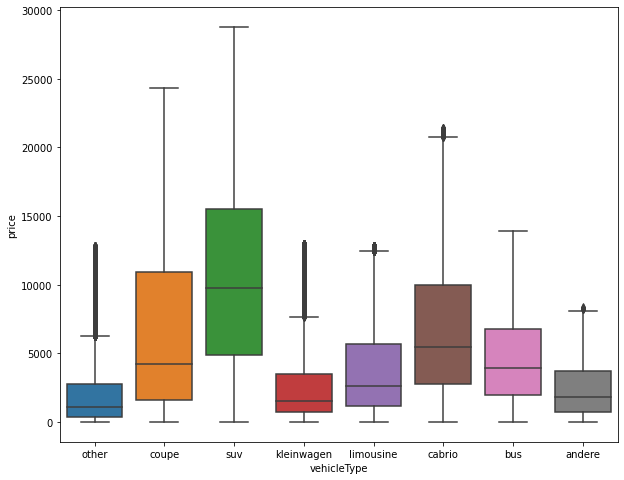

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(x="vehicleType",y="price",data=new_data)

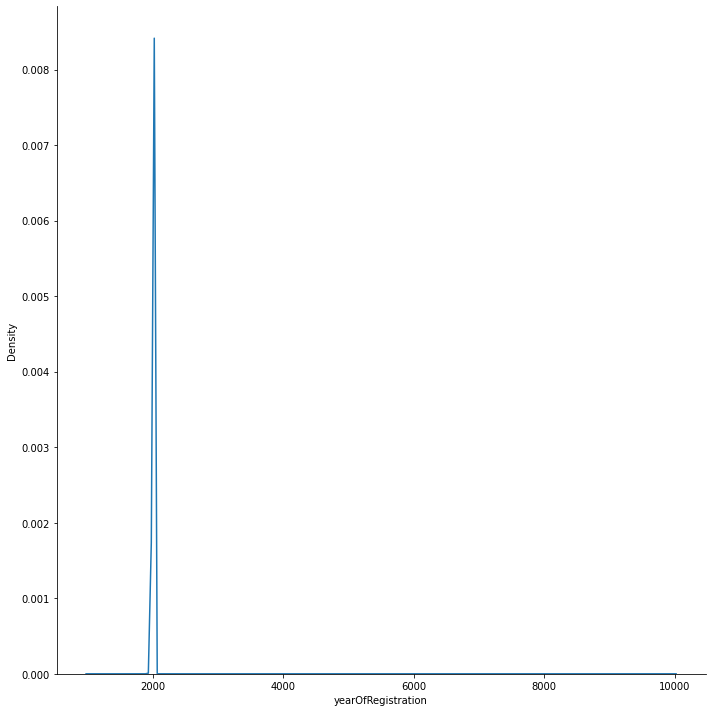

In [64]:
sns.displot(data=new_data,x='yearOfRegistration',kind='kde',height=10)

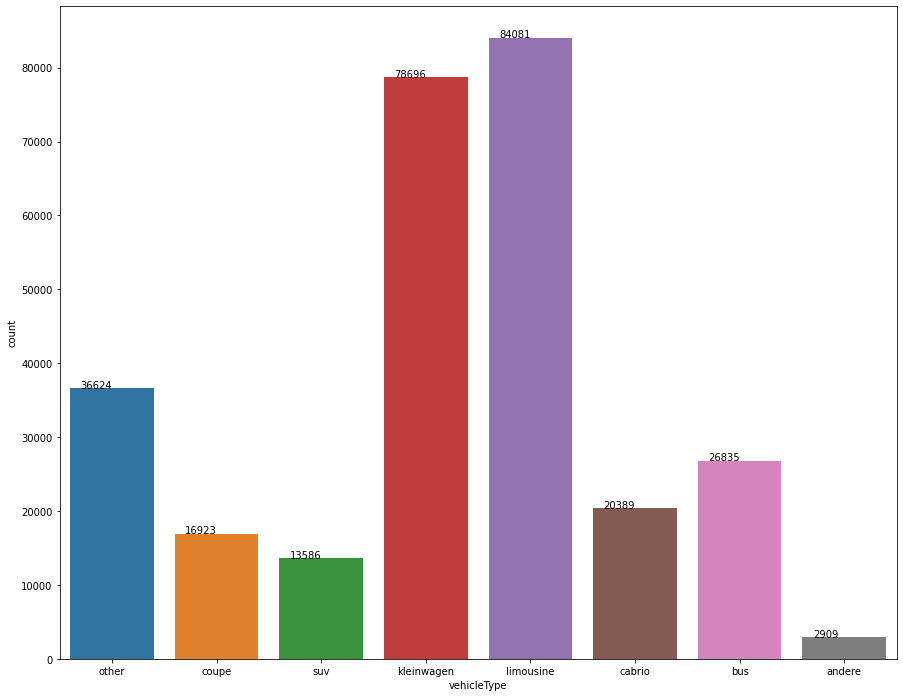

In [65]:
fig,ax=plt.subplots(figsize=(15,12))
sns.countplot(data=new_data,x='vehicleType')

for p in ax.patches: 
  ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50))